In [1]:
import pandas as pd
from util import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import data_cleaning
from data_cleaning import *
import seaborn as sns
import matplotlib.style

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", None)
pd.set_option("precision", 3)
sns.set_context("talk") # talk context is good for RISE presentations
matplotlib.style.use('default')
%pylab inline
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
font = {
        'weight' : 'normal',
        'size'   : 18,
        }

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('../data/actions_taken_1-2-3_all_banks_loan_purposes_31_state_ma.csv')
df.head(3)
df['denial_reason-1'].value_counts()

10      60894
1        4904
1111     4864
7        2180
3        2148
4        1793
9        1110
6         415
5         201
2         109
8           2
Name: denial_reason-1, dtype: int64

In [4]:
engine = gen_engine('refinance')

In [5]:
# generate a table named 'ma_refinance' for database 'refinance'
df.to_sql('ma_refinance', engine, index=False, if_exists='replace')
# An alternative way is to run  ../data/sql_db_setup.sql

In [6]:
q = """
SELECT * from ma_refinance
"""
df = do(q)
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2019,254900WTZC5SSKIN2M11,15764,MA,"25,017.00","25,017,341,800.00",C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Male,1,0,2,1,31,1,2,2,2,"265,000.00",32.1,5.75,2.394,2,10180.2,None,8125.0,None,500.0,180,None,None,2,2,2,2,815000,1,1,3,5,1,None,114.00,30%-<36%,3,10,1.00,nan,nan,nan,None,5.00,nan,nan,None,None,2,4,5.00,nan,nan,nan,nan,8.00,nan,nan,nan,nan,2,4,1,5,2,4,35-44,9999,No,None,2,1,6,nan,nan,nan,nan,10,nan,nan,nan,6382,59.71,115500,39,688,1736,63
1,2019,254900WTZC5SSKIN2M11,15764,MA,"25,009.00","25,009,207,000.00",C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,1,0,2,1,31,1,2,2,1,"265,000.00",50.29,7.75,None,3,None,None,None,None,None,300,None,None,2,2,2,2,525000,1,3,3,5,2,None,89.00,20%-<30%,3,10,3.00,nan,nan,nan,None,5.00,nan,nan,None,None,2,4,6.00,nan,nan,nan,nan,8.00,nan,nan,nan,nan,2,4,1,5,2,4,25-34,9999,No,None,2,1,6,nan,nan,nan,nan,10,nan,nan,nan,2240,75.67,115500,36,118,315,49
2,2019,254900WTZC5SSKIN2M11,15764,MA,"25,017.00","25,017,330,100.00",C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Male,1,0,2,1,31,1,2,2,2,"305,000.00",52.27,6.625,2.585,2,10879.7,None,9225.0,None,500.0,360,None,None,2,2,2,2,575000,1,1,3,5,1,None,75.00,45,3,10,1.00,nan,nan,nan,None,5.00,nan,nan,None,None,2,4,5.00,nan,nan,nan,nan,8.00,nan,nan,nan,nan,2,4,1,5,2,4,35-44,9999,No,None,2,1,6,nan,nan,nan,nan,10,nan,nan,nan,8427,10.47,115500,156,2685,2874,40
3,2019,254900WTZC5SSKIN2M11,14454,MA,"25,025.00","25,025,000,202.00",C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,3,0,2,1,31,1,2,2,2,"395,000.00",27.86,None,None,3,None,None,None,None,None,180,None,None,2,2,2,2,1405000,1,1,3,5,2,None,120.00,41,9,10,3.00,nan,nan,nan,None,5.00,nan,nan,None,None,2,4,6.00,nan,nan,nan,nan,8.00,nan,nan,nan,nan,2,4,3,5,2,4,35-44,9999,No,None,1,1,6,nan,nan,nan,nan,4,nan,nan,nan,3587,40.98,105500,58,395,1176,76
4,2019,254900WTZC5SSKIN2M1

In [7]:
df_new = data_cleaning(df)


In [8]:
# generate a table named 'ma_refinance_new' for database 'refinance' 
df_new.to_sql('ma_refinance_new', engine, index=False, if_exists='replace')

In [9]:
# now load the new database to df
q = """
SELECT * from ma_refinance_new
"""
df = do(q)
df.head()

,derived_msa_md,county_code,conforming_loan_limit,derived_loan_product_type,derived_race,derived_sex,lien_status,open_end_line_of_credit,business_or_commercial_purpose,hoepa_status,interest_only_payment,balloon_payment,occupancy_type,total_units,applicant_race_1,applicant_sex,applicant_age_above_62,co_applicant_age_above_62,loan_term,loan_amount,property_value,loan_to_value_ratio,income,debt_to_income_ratio,total_age,applicant_age,co_applicant_age,action_taken,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4
0,15764,25017,C,First,White,Male,1,2,2,2,2,2,1,1,White,1,No,N/A,180,"265,000.00",815000,32.10,114.00,33,40,40,0,1,10,nan,nan,nan
1,15764,25009,C,First,Race Not Available,Male,1,2,1,3,2,2,3,2,No info.,1,No,N/A,300,"265,000.00",525000,50.29,89.00,25,30,30,0,1,10,nan,nan,nan
2,15764,25017,C,First,White,Male,1,2,2,2,2,2,1,1,White,1,No,N/A,360,"305,000.00",575000,52.27,75.00,45,40,40,0,1,10,nan,nan,nan
3,14454,25025,C,First,Race Not Available,Sex Not Available,1,2,2,3,2,2,1,2,No info.,3,No,N/A,180,"395,000.00",1405000,27.86,120.00,41,40,40,0,0,4,nan,nan,nan
4,15764,25009,C,First,White,Female,1,2,2,2,2,2,1,1,White,2,No,N/A,360,"235,000.00",495000,48.37,61.00,38,30,30,0,1,10,nan,nan,nan


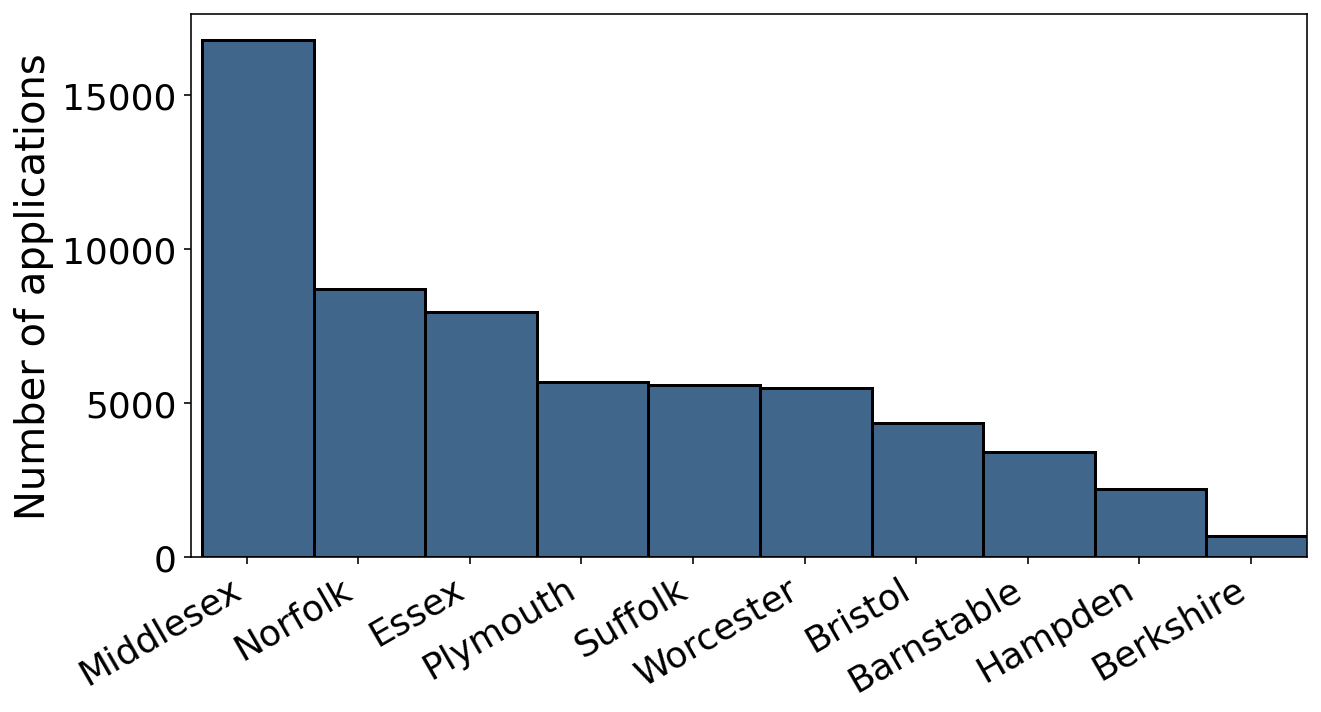

In [10]:
q = """
SELECT county_code, COUNT(derived_msa_md) AS count
FROM ma_refinance_new
GROUP BY county_code
ORDER BY count DESC;
"""
res = do(q)
res = res.head(10)


plt.subplots(figsize=(10,5))

ax= sns.barplot(x=res.index,
                y=res['count'],
                data=res,
                color=(0.2, 0.4, 0.6),
                edgecolor=(0,0,0),
                linewidth=1.5
               )
ax.set_ylabel("Number of applications", fontsize=20);
x_ticklabel = ['Middlesex', 'Norfolk', 'Essex', 'Plymouth',
               'Suffolk', 'Worcester', 'Bristol', 'Barnstable',
               'Hampden', 'Berkshire', ]
ax.set_xticklabels(x_ticklabel,
                   rotation=30, 
                   horizontalalignment='right'
                  );
[t_ax.set_width(1) for t_ax in ax.patches];


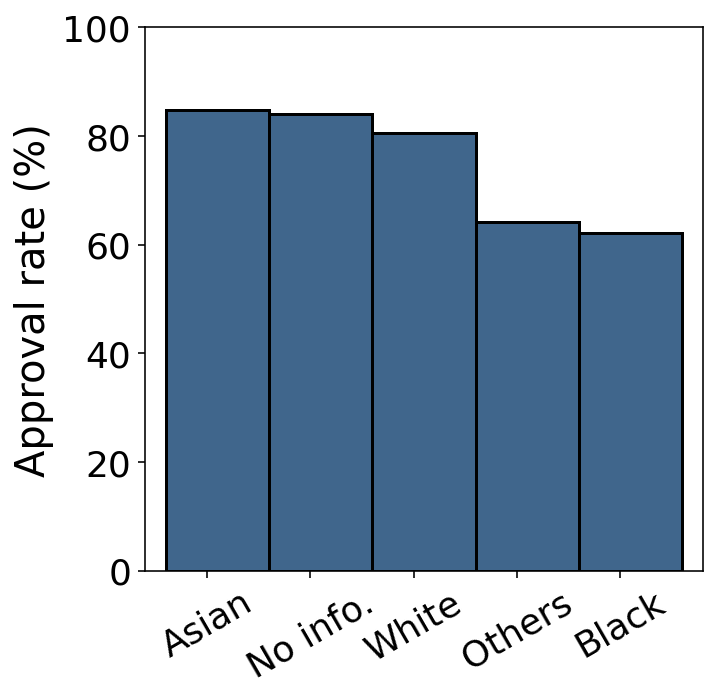

In [11]:
# approve rate for different races
approval_rate = race_approval_rate(df_new)
approval_rate
data_to_plot = pd.DataFrame(data=approval_rate).T.sort_values(by=0, ascending=False).T
plt.subplots(figsize=(5, 5))
ax = sns.barplot(data=data_to_plot,
                 color=(0.2, 0.4, 0.6),
                 edgecolor=(0,0,0),
                 linewidth=1.5)
[t_ax.set_width(1) for t_ax in ax.patches];
ax.set_xticklabels(['Asian', 'No info.', 'White', 'Others', 'Black'], rotation=30)
ax.set_ylabel('Approval rate (%)', fontsize=20);
ax.set_ylim([0, 100]);
ax.set_xlim([-0.6, 4.8]);

In [12]:
type(df_new['loan_to_value_ratio'][0])

numpy.float64

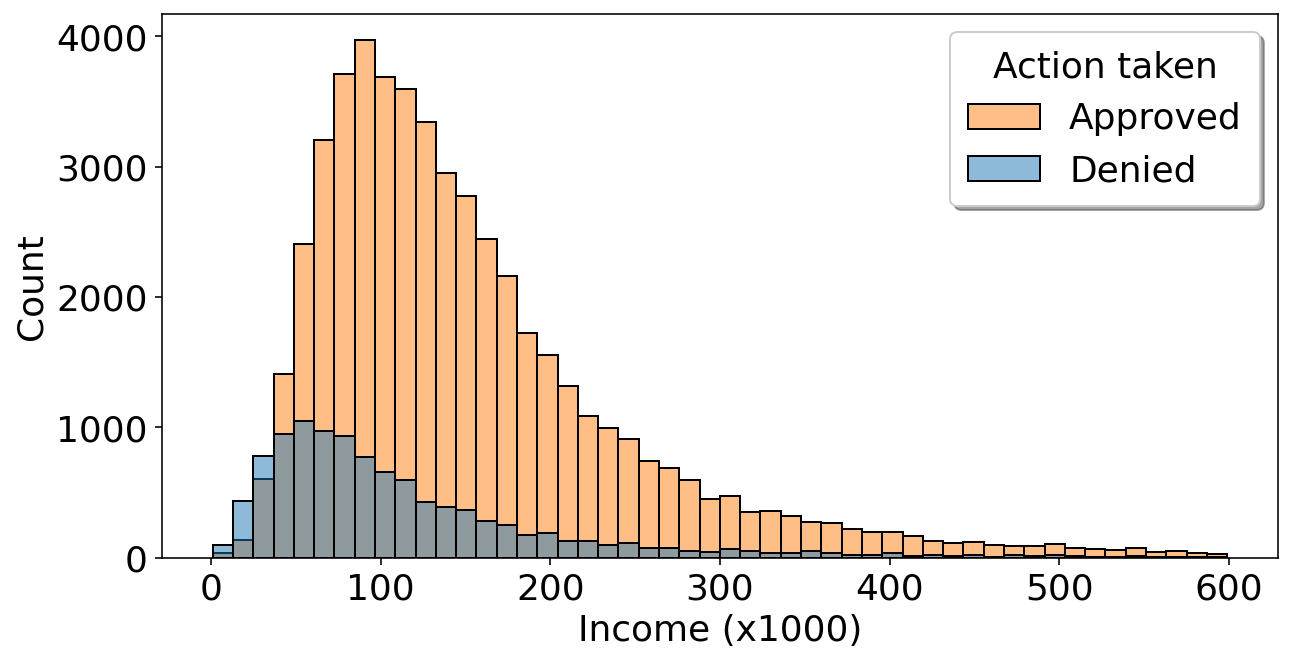

In [13]:
# income hist
q = """
SELECT income, action_taken FROM ma_refinance_new

"""
res = do(q)

res = res[res['income'] < 600]
res.head()
plt.subplots(figsize=(10,5))
ax = sns.histplot(data=res,x='income', hue='action_taken', bins=50)
ax.set_xlabel('Income (x1000)');
ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);

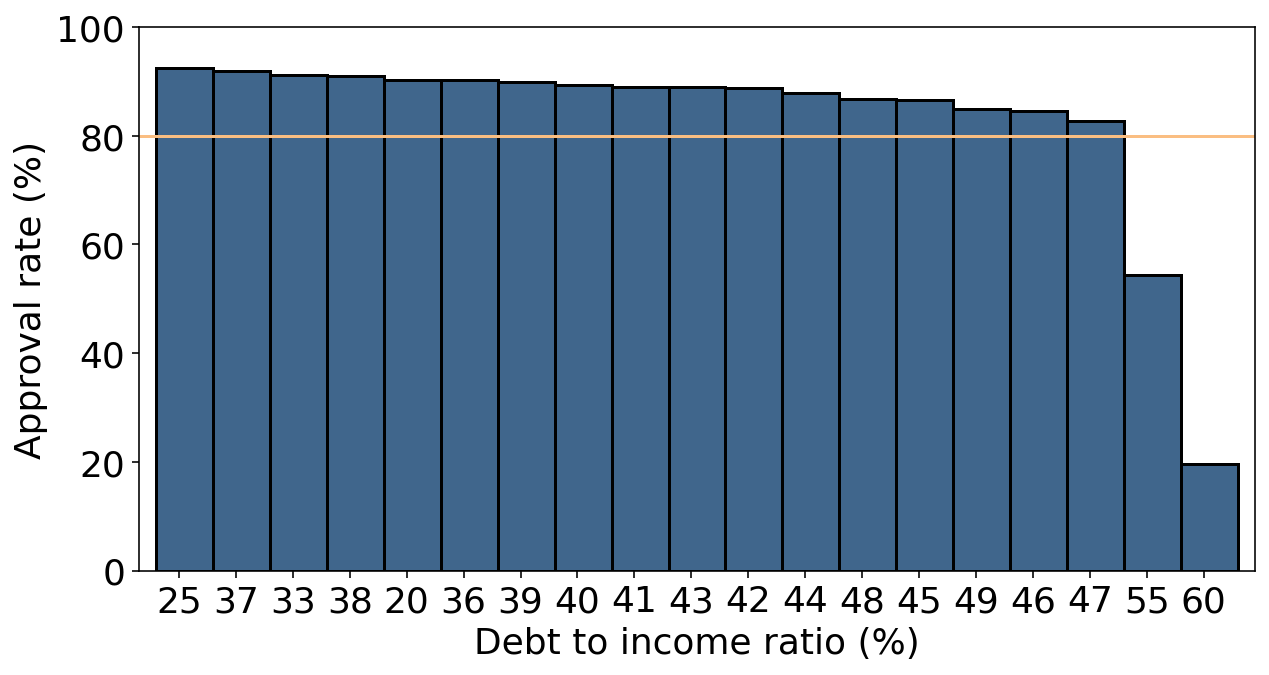

In [14]:
q = """
SELECT debt_to_income_ratio, action_taken FROM ma_refinance_new
"""
res = do(q)
d2i_ratio = res['debt_to_income_ratio'].unique()
app_rate = defaultdict(list)
for d in d2i_ratio:
    t = res[res['debt_to_income_ratio'] == d]
    mask = t['action_taken'] == 1
    app_rate[d].append(100*sum(t['action_taken'][mask])/len(t))
data_to_plot = pd.DataFrame(data=app_rate).T.sort_values(by=0, ascending=False).T

plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=data_to_plot,
                 color=(0.2, 0.4, 0.6),
                 edgecolor=(0,0,0),
                 linewidth=1.5)
[t_ax.set_width(1) for t_ax in ax.patches];
plt.plot([-1, 60], [80, 80], color=[250/255, 190/255, 130/255]);
ax.set_xlim([-0.7, 18.9]);
ax.set_ylim([0, 100]);
ax.set_xlabel('Debt to income ratio (%)');
ax.set_ylabel('Approval rate (%)');

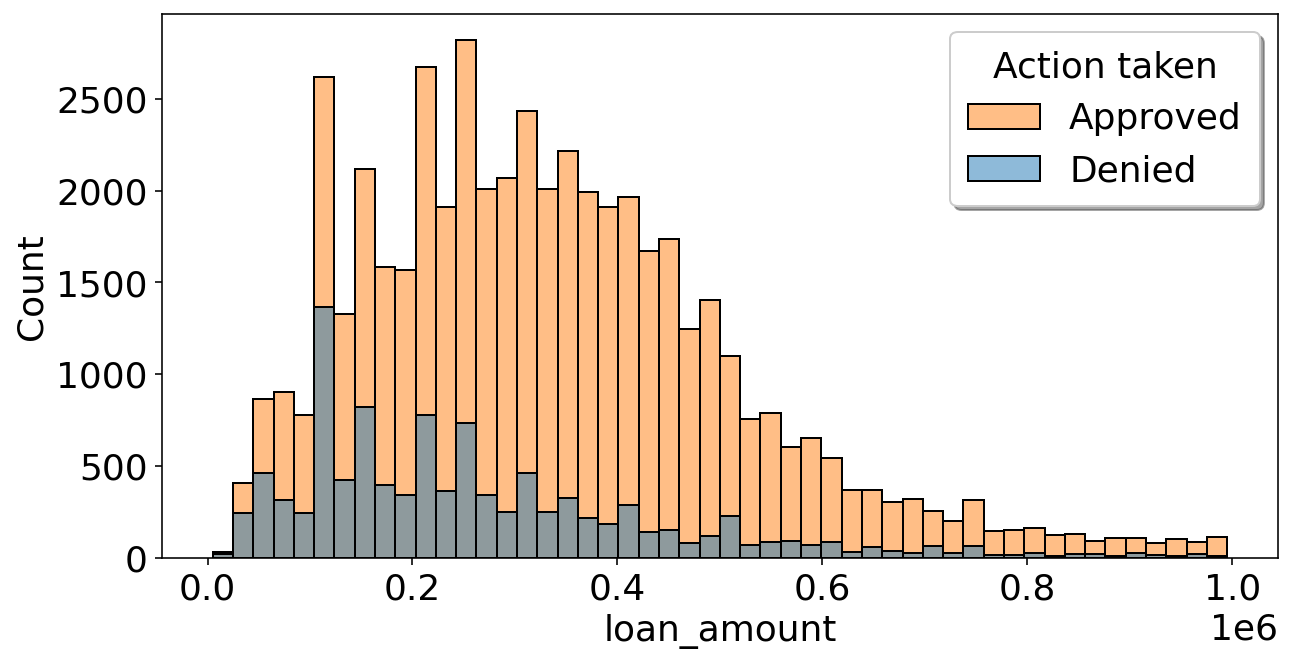

In [15]:
q = """
SELECT loan_amount, action_taken FROM ma_refinance_new
"""
res = do(q)
res = res[res['loan_amount'] < 1e6]
plt.subplots(figsize=(10,5))
ax = sns.histplot(data=res,x='loan_amount', hue='action_taken',bins=50)
ax.set_xlabel('loan_amount');
ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);

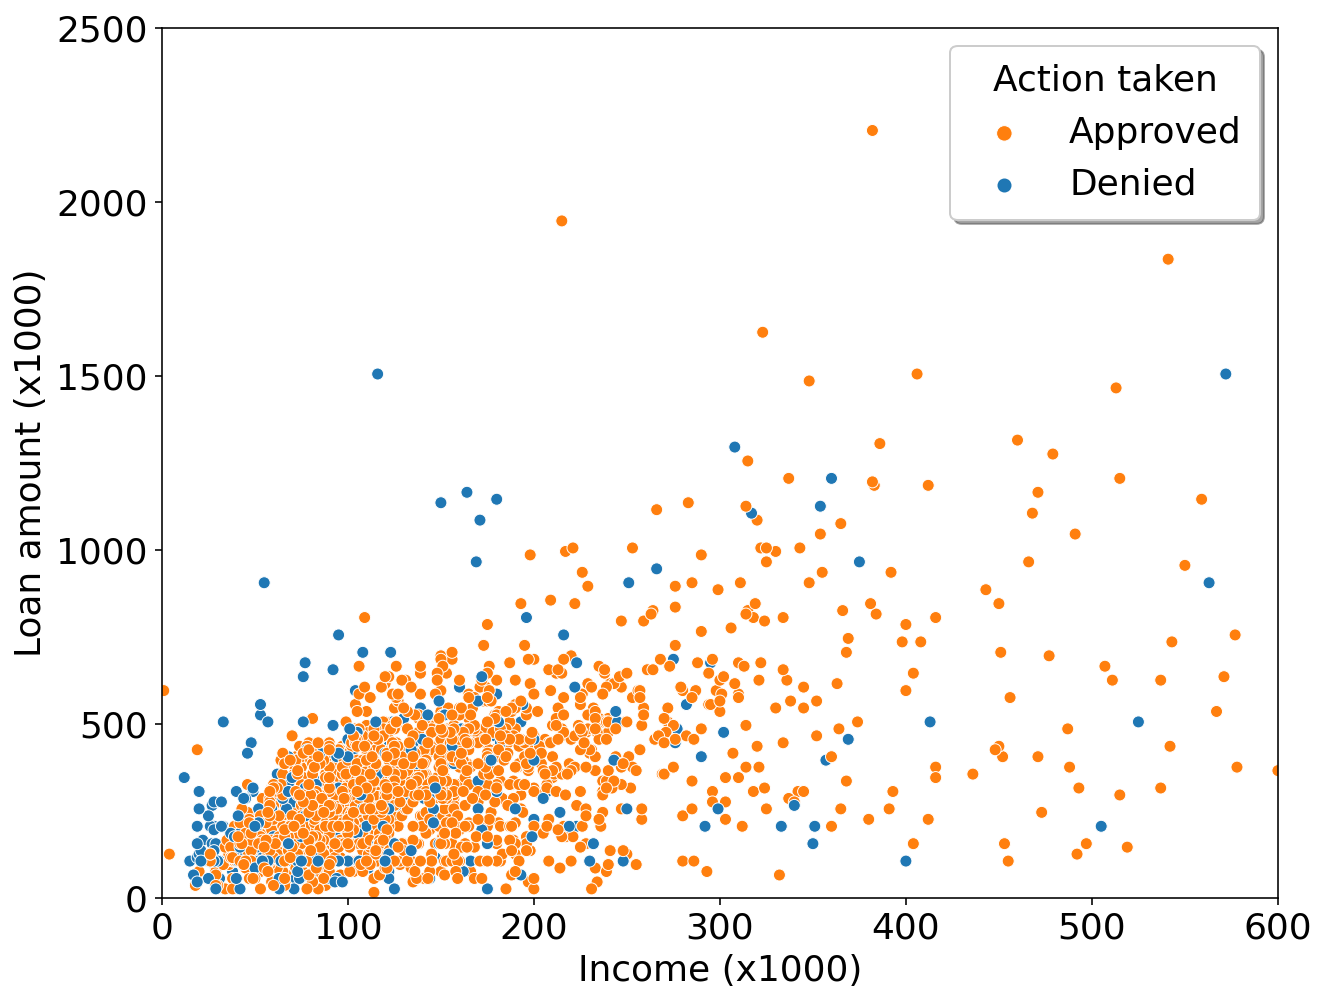

In [16]:
q = """
SELECT loan_amount, income, action_taken FROM ma_refinance_new
"""

res = do(q)
res['loan_amount'] = res['loan_amount']/1000
plt.subplots(figsize=(10, 8))
ax = sns.scatterplot(data=res.sample(2000), x='income', y='loan_amount', hue='action_taken')
plt.xlim([0, 600])
plt.ylim([0, 2500])
plt.xlabel('Income (x1000)')
plt.ylabel('Loan amount (x1000)');

t = ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);
t.legendHandles[0].set_sizes((60, 2)) 

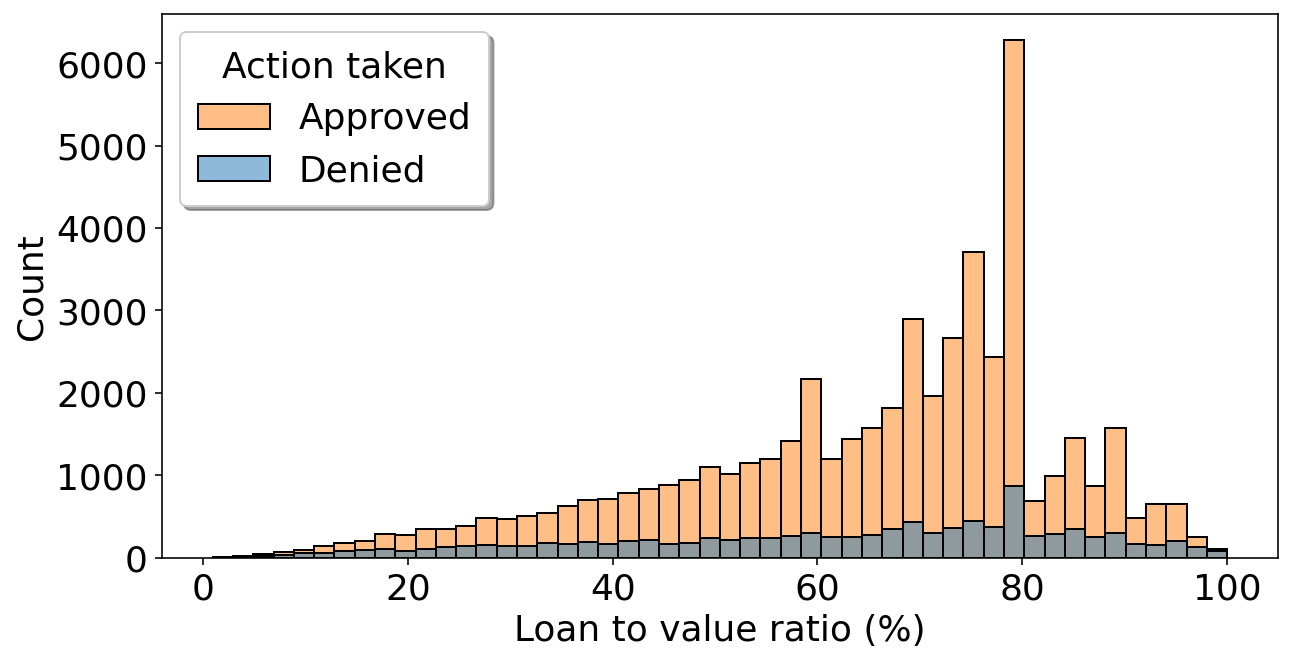

In [17]:
q = """
SELECT loan_to_value_ratio, action_taken FROM ma_refinance_new
"""
res = do(q)
res = res[res['loan_to_value_ratio']<100]
plt.subplots(figsize=(10,5))
ax = sns.histplot(data=res, x='loan_to_value_ratio', hue='action_taken', bins=50)
ax.set_xlabel('Loan to value ratio (%)')
ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);

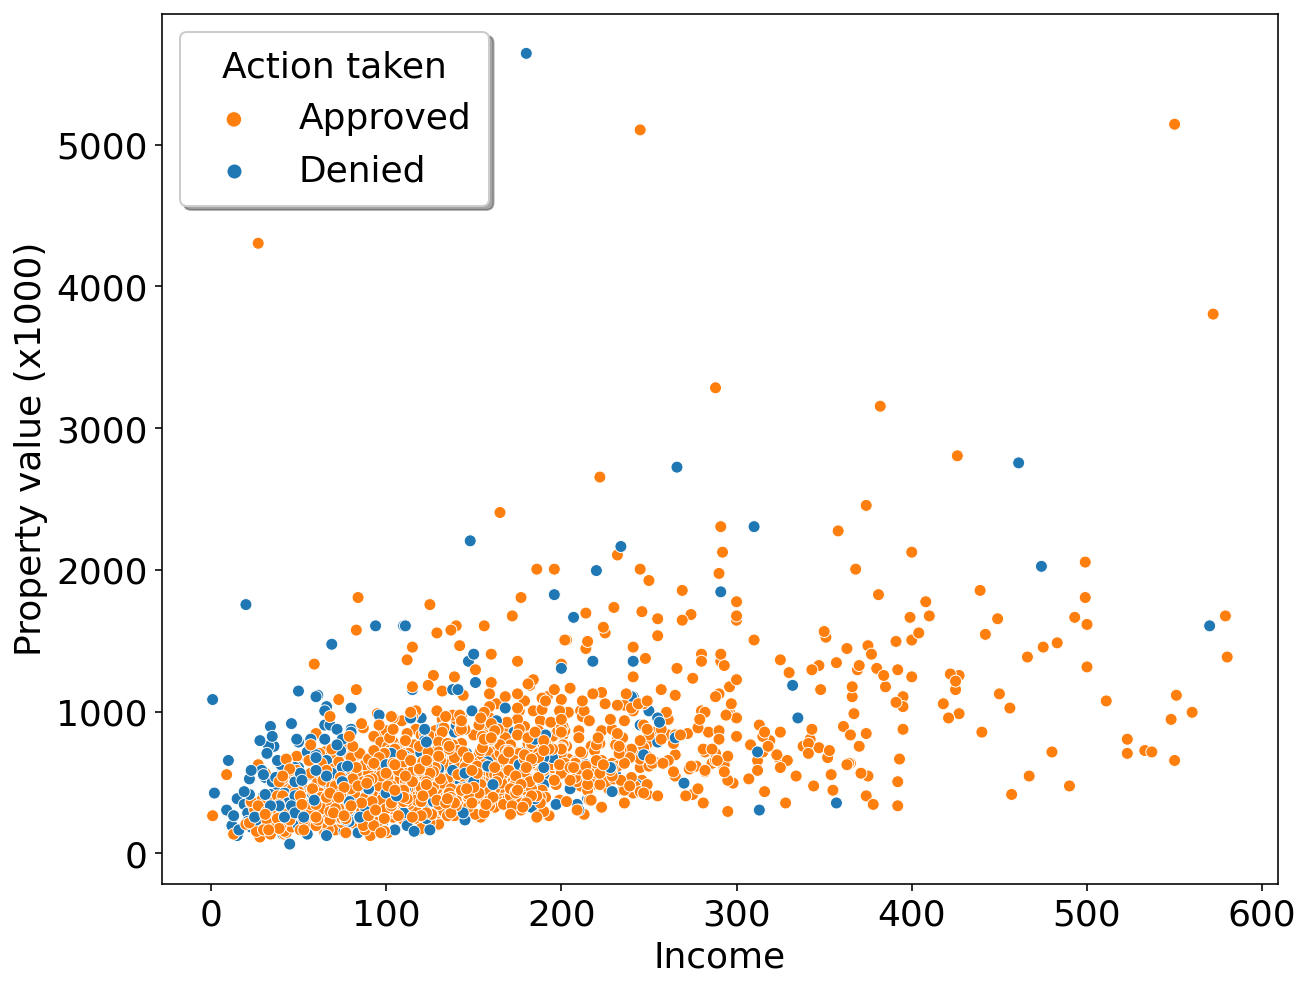

In [18]:
q = """
SELECT property_value, income, action_taken
FROM ma_refinance_new
"""
res = do(q)
res = res[(res['income'] < 600) & (res['property_value'] < 6e6)]
res['property_value'] = res['property_value']/1000
plt.subplots(figsize=(10, 8))
ax = sns.scatterplot(data=res.sample(2000), x='income',y='property_value', hue='action_taken')
ax.set_xlabel('Income')
ax.set_ylabel('Property value (x1000)')
t = ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);
t.legendHandles[0].set_sizes((60, 20)) 

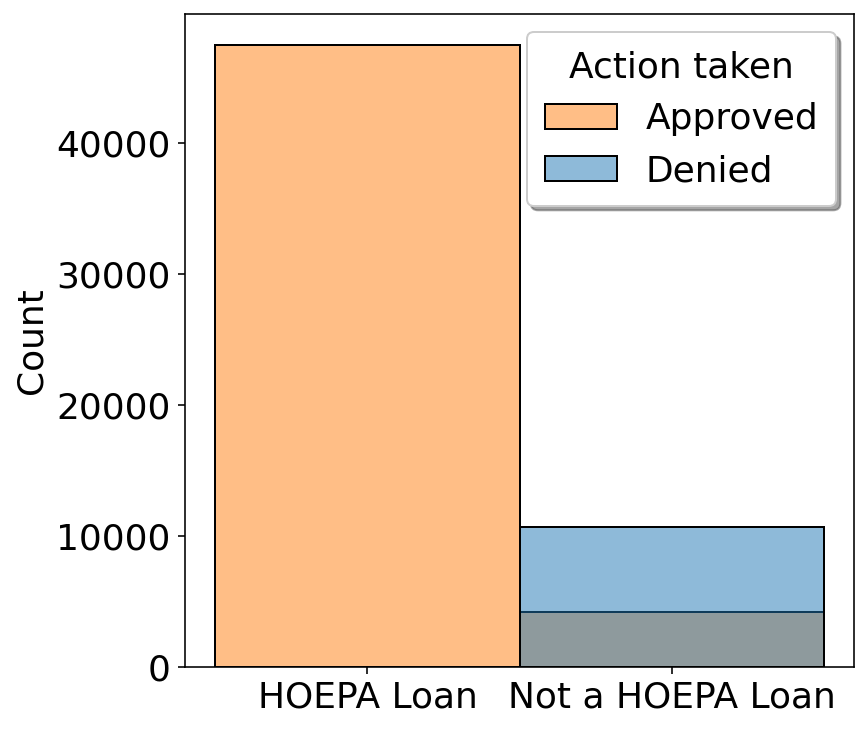

In [19]:
q = """
SELECT hoepa_status, action_taken FROM ma_refinance_new
"""
res = do(q)
idx = res['hoepa_status'][res['hoepa_status'] == '1'].index
res = res.drop(idx, inplace=False)


plt.subplots(figsize=(6,6))
ax = sns.histplot(data=res, x='hoepa_status', hue='action_taken')
ax.set_xlabel('')
ax.set_xticklabels(['HOEPA Loan', 'Not a HOEPA Loan'])
ax.legend(('Approved', 'Denied'), title='Action taken',
          framealpha=1, shadow=True, borderpad=0.5);
plt.savefig("../figures/hoepa_status_count.svg",
            dpi=300, bbox_inches='tight', facecolor="white")

In [20]:
q = """
SELECT hoepa_status, action_taken, COUNT(action_taken) FROM ma_refinance_new
GROUP BY action_taken,  hoepa_status
Having action_taken = 0

"""
res= do(q)

In [21]:
res.head()

,hoepa_status,action_taken,count
0,3,0,10682


In [22]:
q = """
SELECT hoepa_status, action_taken, COUNT(action_taken) FROM ma_refinance_new
GROUP BY action_taken,  hoepa_status
Having COUNT(action_taken) > 10000

"""
res= do(q)
res

,hoepa_status,action_taken,count
0,2,1,47469
1,3,0,10682


In [23]:
q = """
SELECT hoepa_status, action_taken, COUNT(action_taken) FROM ma_refinance_new
GROUP BY action_taken,  hoepa_status
Having hoepa_status = '3'

"""
res= do(q)
res

,hoepa_status,action_taken,count
0,3,0,10682
1,3,1,4144
